In [4]:
import os
from nilearn import plotting
from nilearn import image
import pandas as pd
from nilearn.glm.first_level import FirstLevelModel
 

# Define event data
subject_data = "/home/avalazem/Desktop/Work/Single_Word_Processing_Stage/fMRI_Data_Analysis/event_tsvs/sub1_run_1_events.tsv"
events = pd.read_table(subject_data)

# Create a design matrix
fmri_glm = FirstLevelModel(
    t_r=1.81,
    noise_model="ar1",
    standardize=False,
    hrf_model="spm",
    drift_model="cosine",
    high_pass=0.01,
)

# Import File
file_path = "/home/avalazem/Desktop/Work/Single_Word_Processing_Stage/fMRI_Data_Analysis/single-word-processing/data/derivatives/sub-01/ses-1/anat/sub-01_ses-1_space-MNI152NLin2009cAsym_desc-preproc_T1w.nii.gz"

plot.design_matrix(fmri_glm.compute_design_matrix(events))

#print(image.load_img(file_path).shape)
#plotting.plot_stat_map(image.index_img(file_path, 90))



NameError: name 'plot' is not defined

In [5]:
from nilearn.image import mean_img
from nilearn.plotting import plot_anat, plot_img, plot_stat_map, show


# Define event data
subject_data = "/home/avalazem/Desktop/Work/Single_Word_Processing_Stage/fMRI_Data_Analysis/event_tsvs/sub1_run_1_events.tsv"

# Import File
file_path = "/home/avalazem/Desktop/Work/Single_Word_Processing_Stage/fMRI_Data_Analysis/single-word-processing/data/derivatives/sub-01/ses-1/anat/sub-01_ses-1_space-MNI152NLin2009cAsym_desc-preproc_T1w.nii.gz"

fmri_img = subject_data.func
mean_img = mean_img(subject_data.func[0], copy_header=True)
plot_img(mean_img, colorbar=True, cbar_tick_format="%i", cmap="gray")

plot_anat(subject_data.anat, colorbar=True, cbar_tick_format="%i")

show()

AttributeError: 'str' object has no attribute 'func'

In [5]:
from nilearn.datasets import fetch_spm_auditory

subject_data = fetch_spm_auditory()


[get_dataset_dir] Dataset found in /home/avalazem/nilearn_data/spm_auditory


In [12]:
print(subject_data.description)

.. _spm_auditory_dataset:

SPM auditory dataset

Access
------
See :func:`nilearn.datasets.fetch_spm_auditory`.

Notes
-----
These whole brain BOLD/EPI images were acquired on a modified 2T Siemens MAGNETOM Vision system.
Each acquisition consisted of 64 contiguous slices (64x64x64 3mm x 3mm x 3mm voxels).
Acquisition took 6.05 seconds, with the scan to scan repeat time (RT) set arbitrarily to 7 seconds.

96 acquisitions were made (RT= 7 seconds), in blocks of 6, giving 16 blocks of 42 seconds.
The condition for successive blocks alternated between rest and auditory stimulation,
starting with rest.

Auditory stimulation was bi-syllabic words presented binaurally at a rate of 60 per minute.

A structural image was also acquired.

.. warning::

    This dataset is a raw BIDS dataset.
    The data are in the native space
    and no spatial or temporal preprocessing has been performed.

This experiment was conducted by Geriant Rees
under the direction of Karl Friston and the FIL methods gr

In [3]:
from nilearn.image import mean_img
from nilearn.plotting import plot_anat, plot_img, plot_stat_map, show

fmri_img = subject_data.func
mean_img = mean_img(subject_data.func[0], copy_header=True)
plot_img(mean_img, colorbar=True, cbar_tick_format="%i", cmap="gray")

plot_anat(subject_data.anat, colorbar=True, cbar_tick_format="%i")

show()

NameError: name 'subject_data' is not defined

In [12]:
from nilearn.datasets import fetch_spm_auditory
from nilearn.image import mean_img
from nilearn.plotting import plot_anat, plot_img, plot_stat_map, show
from nilearn.plotting import plot_design_matrix
import pandas as pd
import os


# Import event tsv
# Define event data
subject_data = lambda : None
subject_data.events = "/home/avalazem/Desktop/Work/Single_Word_Processing_Stage/fMRI_Data_Analysis/event_tsvs/sub1_run_1_events.tsv"
events = pd.read_table(subject_data.events)

# Import data
folder_path = "/home/avalazem/Desktop/Work/Single_Word_Processing_Stage/fMRI_Data_Analysis/single-word-processing/data/derivatives/sub-01/ses-1"
subject_data.anat = os.path.join(folder_path, "anat/sub-01_ses-1_space-MNI152NLin2009cAsym_desc-preproc_T1w.nii.gz")
subject_data.func = [os.path.join(folder_path, "func/sub-01_ses-1_task-swp_dir-pa_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz")]





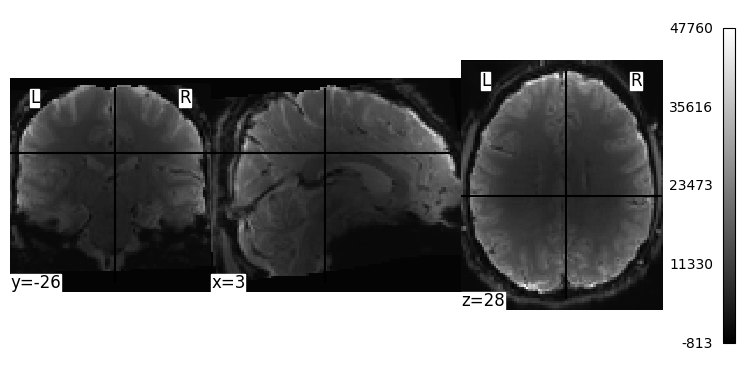

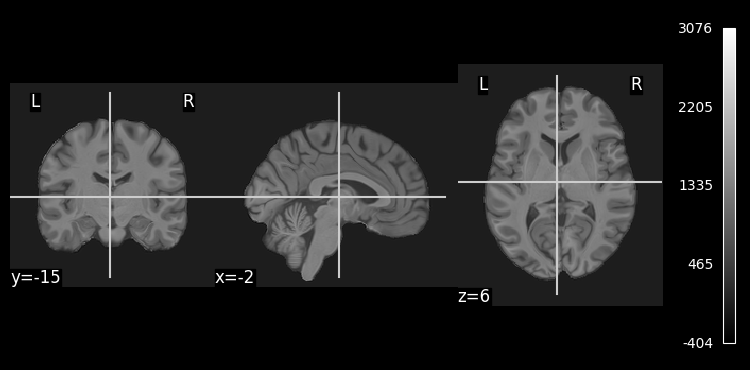

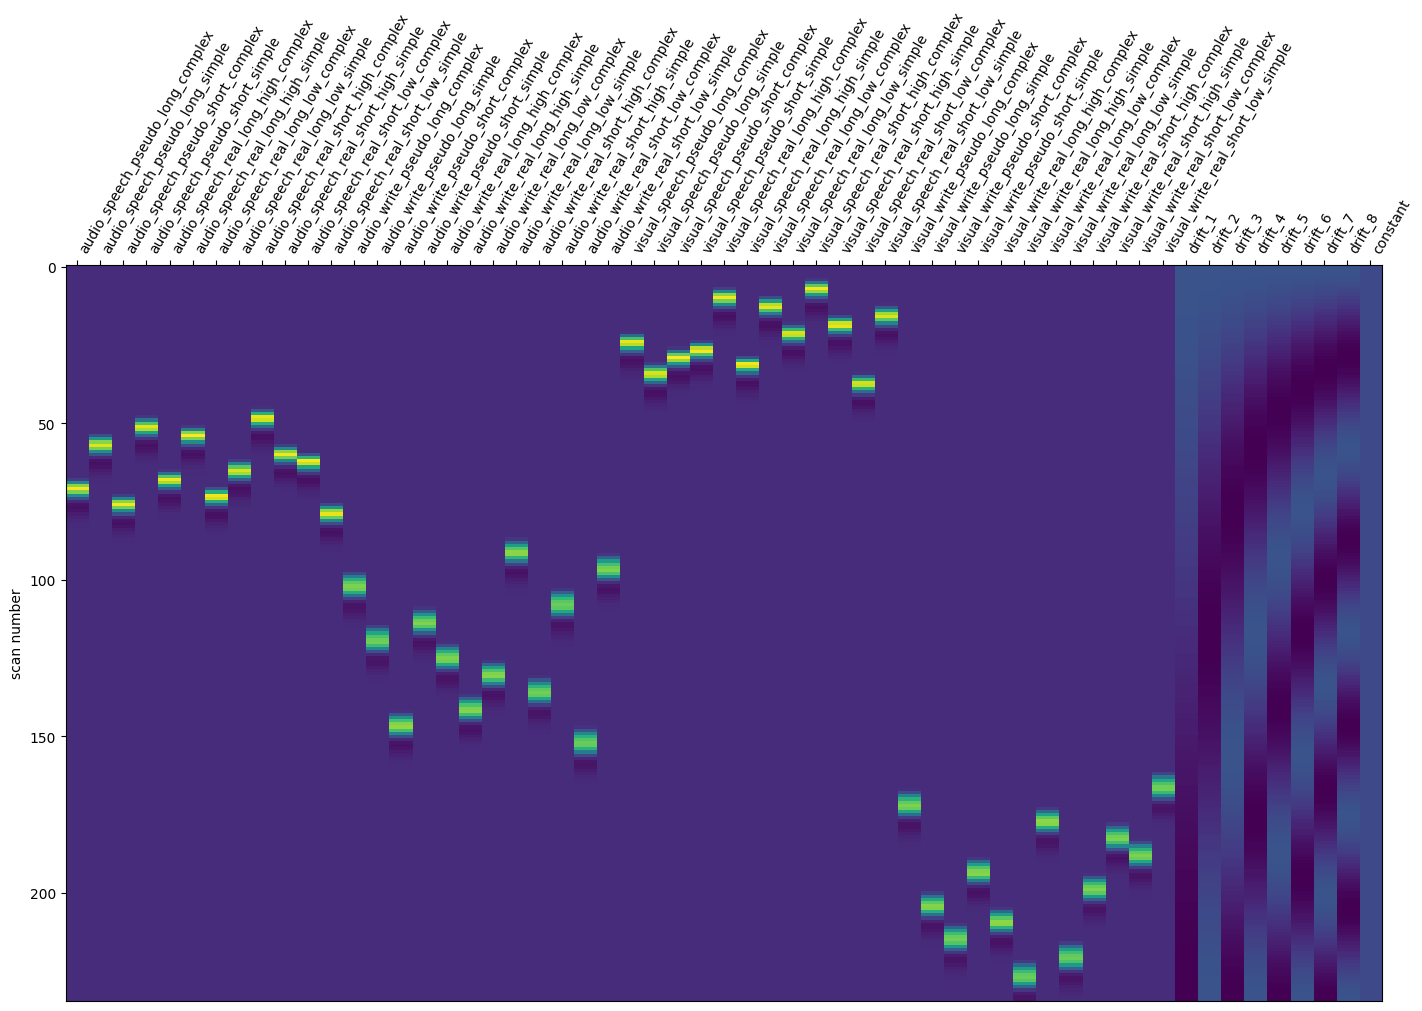

In [13]:
from nilearn.glm.first_level import FirstLevelModel
from nilearn.image import mean_img

# Plotting
fmri_img = subject_data.func
mean_img = mean_img(subject_data.func[0], copy_header=True)

plot_img(mean_img, colorbar=True, cbar_tick_format="%i", cmap="gray")
plot_anat(subject_data.anat, colorbar=True, cbar_tick_format="%i")

#show()

# GLM
fmri_glm = FirstLevelModel(
    t_r=1.81,
    noise_model="ar1",
    standardize=False,
    hrf_model="spm",
    drift_model="cosine",
    high_pass=0.01,
)

fmri_glm = fmri_glm.fit(fmri_img, events)
design_matrix = fmri_glm.design_matrices_[0]
output_dir = "/home/avalazem/Desktop/Work/Single_Word_Processing_Stage/fMRI_Data_Analysis/graphs"
plot_design_matrix(design_matrix)
show()

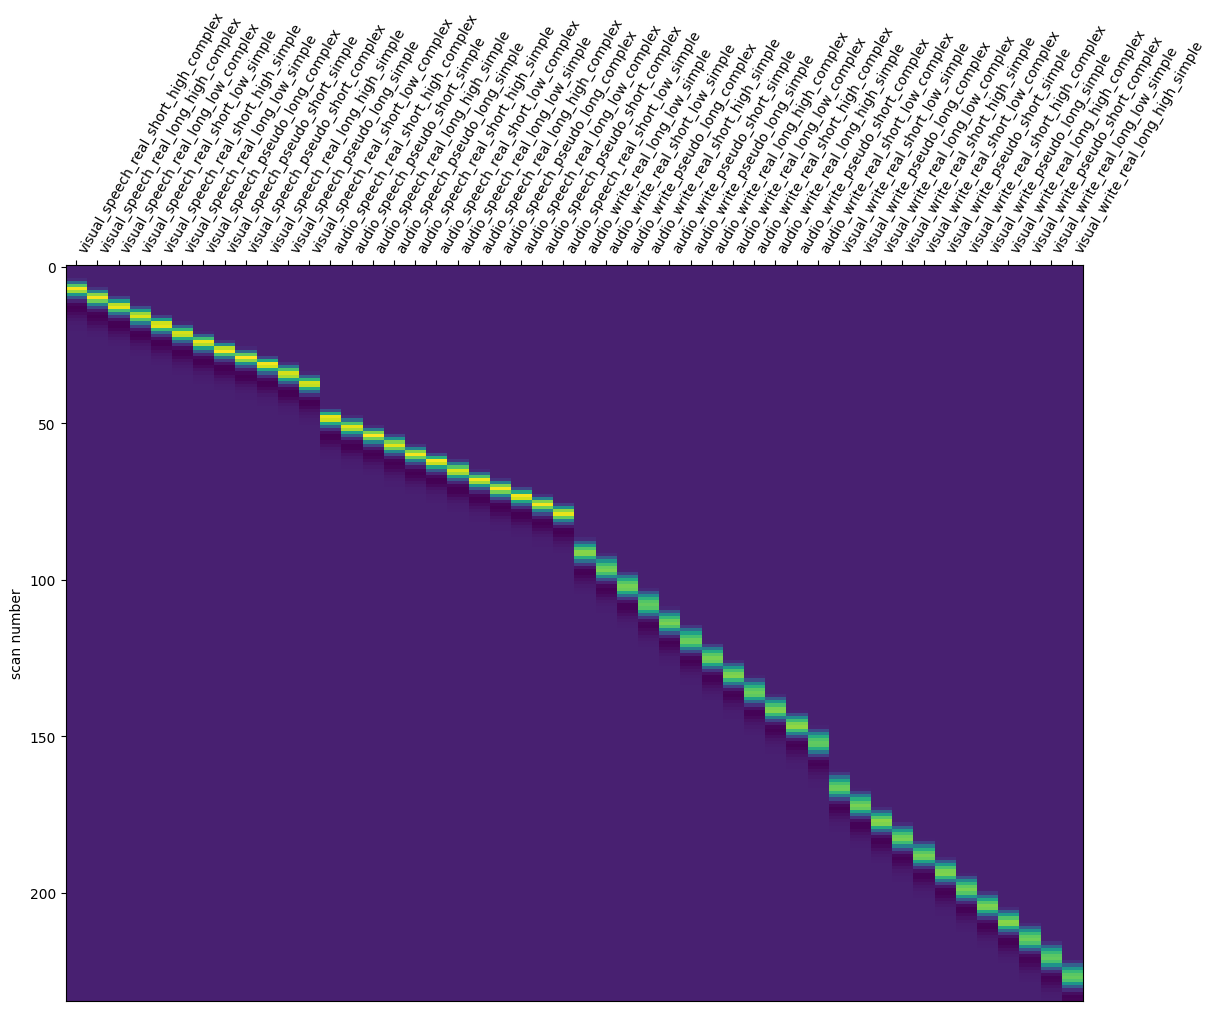

In [8]:
from nilearn.plotting import plot_design_matrix
import matplotlib.pyplot as plt
# conditions = {
#     "input_modality": ("audio",  "visual"),
#     "output_modality": ("speech", "write"),
#     "lexicality": ("pseudo", "real"),
#     "complexity": ("simple", "complex"),
#     "frequency": ("low", "high"),
#     "length": ("short", "long"),
#     "morphology": ("simple", "complex")
# }
all_conditions = pd.read_table(subject_data.events)["trial_type"].unique()
filter = "" # Enter the condition you want to filter by
submat = design_matrix[[condition_name for condition_name in all_conditions if filter in condition_name]]
plot_design_matrix(submat)
show()

<Axes: label='conditions'>

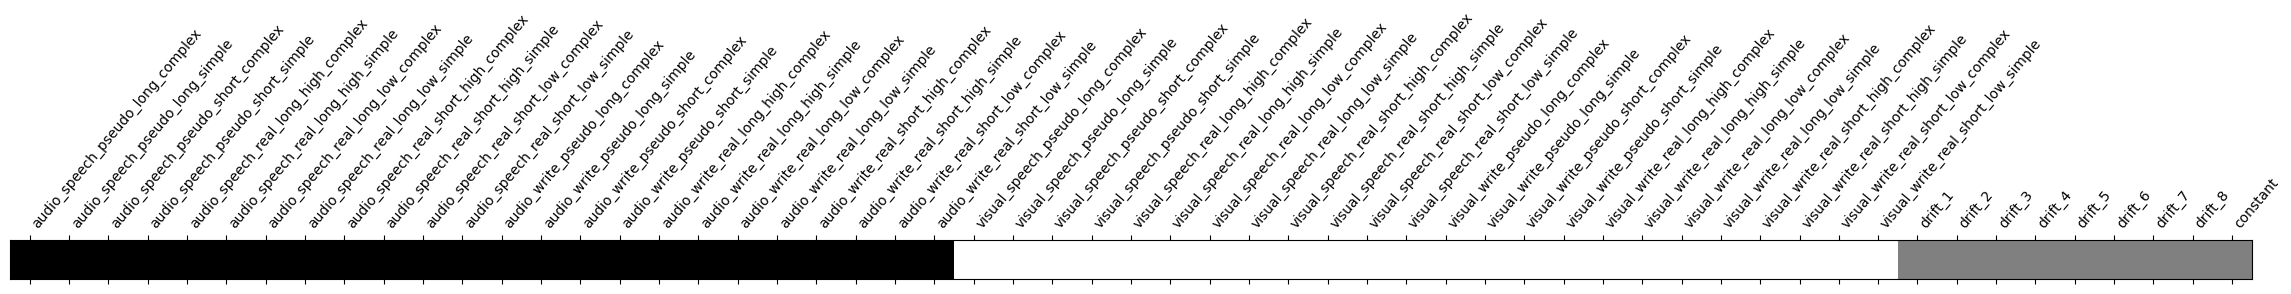

In [ ]:
import numpy as np
from nilearn.plotting import plot_contrast_matrix

n_regressors = design_matrix.shape[1]
activation = np.zeros(n_regressors)
for idx, column in enumerate(design_matrix.columns):
    if "audio" in column:
        activation[idx] = -1
    elif "visual" in column:
        activation[idx] = 1

plot_contrast_matrix(contrast_def = activation, design_matrix=design_matrix)


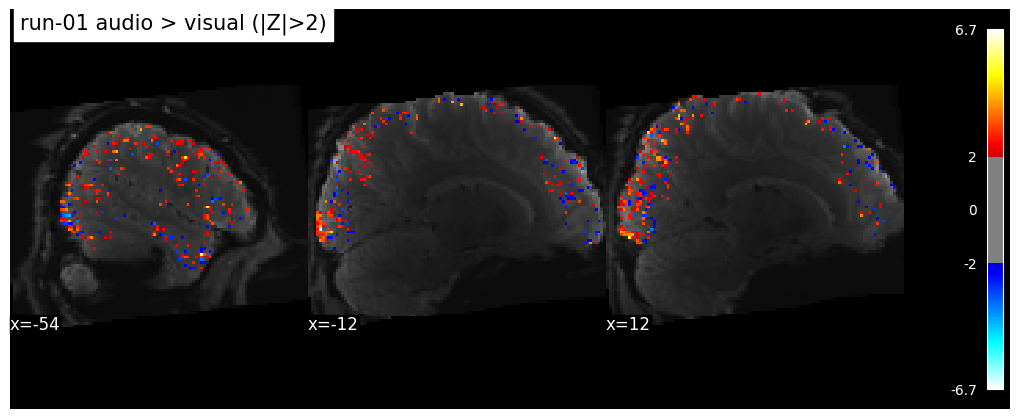

In [10]:
run_id = "run-01"
contrast = "visual-audio"
file_name = f"{run_id}_{contrast}_uncorrected.png"
output_file = f"/home/avalazem/Desktop/Work/Single_Word_Processing_Stage/fMRI_Data_Analysis/graphs/sub-01/{run_id}"
eff_map = fmri_glm.compute_contrast(activation, output_type="effect_size")

z_map = fmri_glm.compute_contrast(activation, output_type="z_score")


plotting_config = {
    "bg_img": mean_img,
    "display_mode": "x",
    "cut_coords": 3,
    "black_bg": True,
}
plot_stat_map(
    z_map,
    threshold=2,
    title=f"{run_id} audio > visual (|Z|>2)",
    figure=plt.figure(figsize=(10, 4)),
    **plotting_config,
)
show()


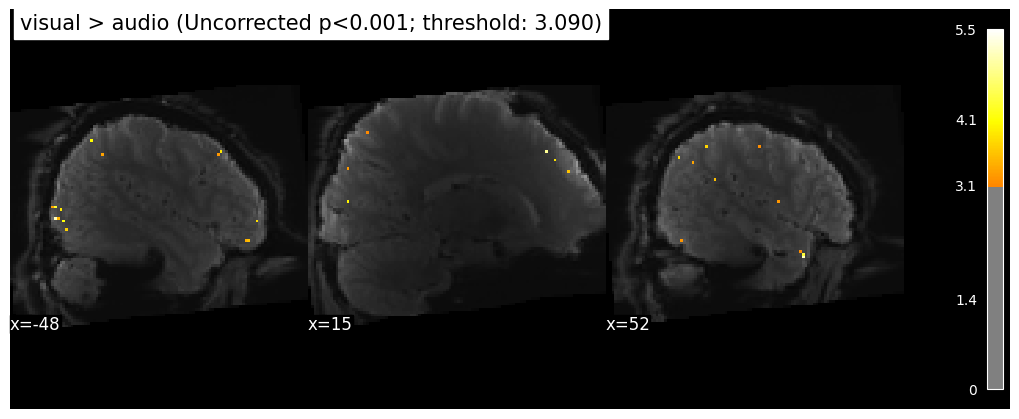

In [102]:
from nilearn.glm import threshold_stats_img

clean_map, threshold = threshold_stats_img(
    z_map,
    alpha=0.001,
    height_control="fpr",
    two_sided=False,  # using a one-sided test
)
# Let's use a sequential colormap as we will only display positive values.
plotting_config["cmap"] = "black_red"
plot_stat_map(
    clean_map,
    threshold=threshold,
    title=(
        "visual > audio (Uncorrected p<0.001; "
        f"threshold: {threshold:.3f})"
    ),
    figure=plt.figure(figsize=(10, 4)),
    **plotting_config,
)
show()

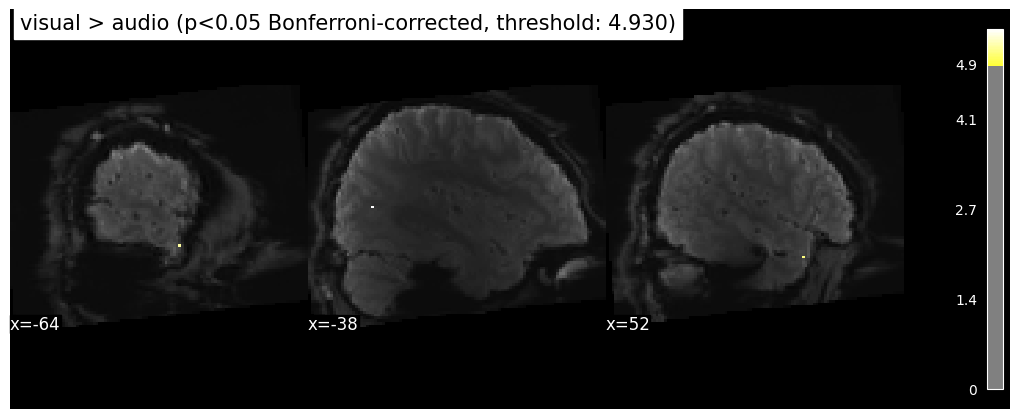

In [101]:
clean_map, threshold = threshold_stats_img(
    z_map, alpha=0.05, height_control="bonferroni", two_sided=False
)
plot_stat_map(
    clean_map,
    threshold=threshold,
    title=(
        "visual > audio (p<0.05 Bonferroni-corrected, "
        f"threshold: {threshold:.3f})"
    ),
    figure=plt.figure(figsize=(10, 4)),
    **plotting_config,
)
show()


In [14]:
file_name = f"{run_id}_{contrast}.png"

clean_map, threshold = threshold_stats_img(
    z_map,
    alpha=0.05,
    height_control="fdr",
    cluster_threshold=8,
    two_sided=False,
)
plot_stat_map(
    clean_map,
    threshold=threshold,
    title=(
        f"{run_id} audio > visual "
        f"(p<0.05 FDR-corrected; threshold: {threshold:.3f}; "
        "clusters > 10 voxels)"
    ),
    figure=plt.figure(figsize=(10, 4)),
    **plotting_config,
)
show()

NameError: name 'threshold_stats_img' is not defined

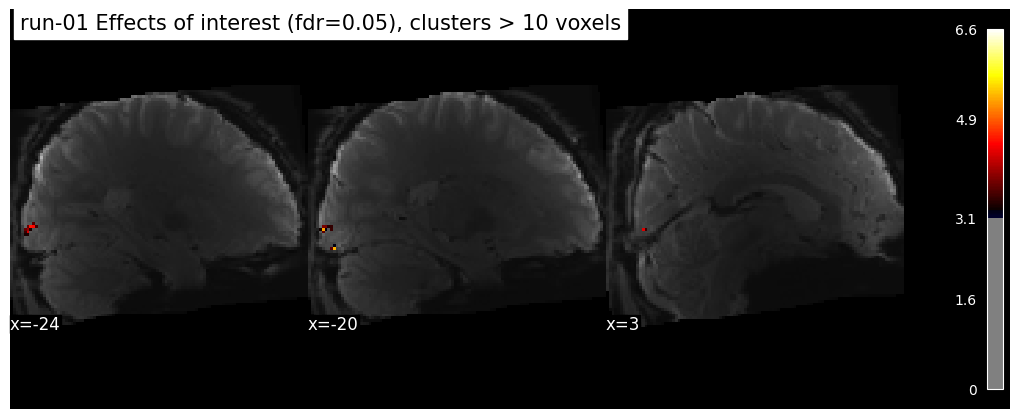

In [167]:

z_map = fmri_glm.compute_contrast(
    activation,
    output_type="z_score",
    stat_type="F",  # set stat_type to 'F' to perform an F test
)

clean_map, threshold = threshold_stats_img(
    z_map,
    alpha=0.05,
    height_control="fdr",
    cluster_threshold=10,
    two_sided=False,
)
plot_stat_map(
    clean_map,
    threshold=threshold,
    title=f"{run_id} Effects of interest (fdr=0.05), clusters > 10 voxels",
    figure=plt.figure(figsize=(10, 4)),
    **plotting_config,
)
show()